<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/An%C3%A1lise_de_departamento_de_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 📂 Projeto | Data Science | By Sarah Faria Rezende </sub>

---


# **Análise de Departamento de Recursos Humanos** 💼📊

É amplamente reconhecido que a retenção de talentos e o enfrentamento de demissões inesperadas são desafios enfrentados por empresas de todos os setores. A redistribuição de tarefas de um funcionário que se desliga pode acarretar em atrasos e/ou queda na qualidade do serviço, resultando em contratempos que repercutem no produto final ou no relacionamento com o cliente. Diante disso, surge a possibilidade de utilizar dados para identificar quais colaboradores apresentam maior probabilidade de deixar a organização.

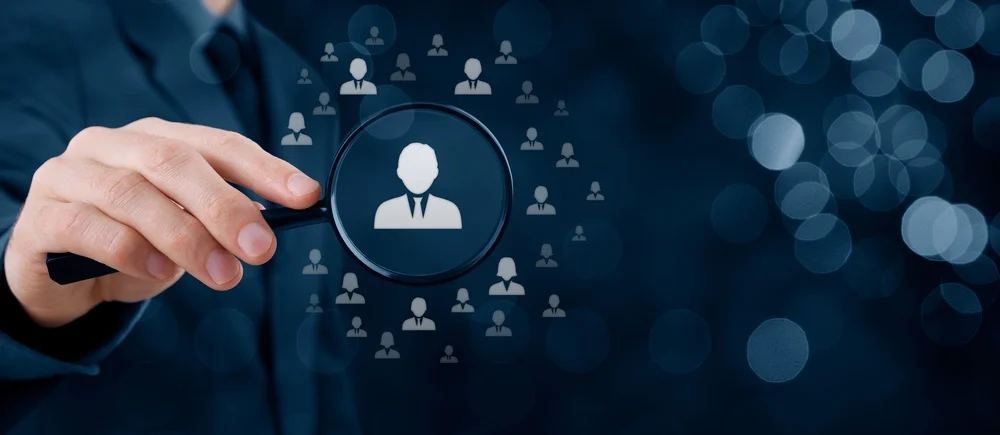

# 📍 Objetivo

Este estudo tem como objetivo identificar potenciais elementos que influenciam os pedidos de demissão dos colaboradores. Ele visa também aplicar modelos de machine learning ao conjunto de dados para prever quais funcionários estão mais propensos a sair da empresa e avaliar a eficácia desses modelos com base em métricas como precisão, recall e pontuação.

### Etapas:

1. Introdução ao Problema
2. Dicionário de Variáveis
3. Importação de Bibliotecas e Conjunto de Dados
4. Visualização dos Dados
5. Pré-processamento e Divisão em Conjuntos de Treinamento/Teste
6. Aplicação de Modelos de Aprendizado de Máquina
7. Considerações Finais


# 1. **Introdução ao Problema**

De acordo com um relatório do [G1](https://https//g1.globo.com/trabalho-e-carreira/noticia/2022/06/30/pais-bate-recorde-de-pedidos-de-demissao-em-12-meses-mostra-levantamento.ghtml), entre junho de **2021** e maio de **2022**, o Brasil testemunhou aproximadamente **6,175** milhões de pedidos de demissão, equivalendo a cerca de **33%** de todos os desligamentos no país.

Um estudo intitulado ["There Are Significant Business Costs to Replacing Employees"](https://www.americanprogress.org/wp-content/uploads/2015/08/CostofTurnover0815.pdf) ressalta que os custos decorrentes de uma demissão, independentemente da sua natureza, podem representar, em média, **16%** do salário anual do colaborador. Para cargos que demandam conhecimentos especializados e anos de experiência, esse custo pode chegar a até **213%** do salário anual. O estudo também conclui que os principais fatores para a retenção de funcionários incluem benefícios familiares que proporcionam flexibilidade para lidar com questões familiares e uma ambiente de trabalho que oferece adaptabilidade.

Além disso, a substituição de funcionários acarreta não apenas em custos diretos relacionados ao processo de contratação, mas também na perda de produtividade durante o período de adaptação do novo colaborador. Nesse contexto, este estudo tem como objetivo identificar indivíduos com maior probabilidade de deixar a empresa, possibilitando a adoção de medidas que incentivem esses funcionários a optarem por permanecer em seus cargos.

# Dicionário de Variáveis

* `Age`: Idade dos funcionários;
* `Attrition`: Indica os funcionários que já saíram da empresa;
* `BusinessTravel`: Frequência de viagem do funcionário;
* `DailyRate`: Salário diário;
* `Department`: Departamento do funcionário;
* `DistanceFromHome`: Distância entre a casa do funcionário e a empresa;
* `Education`: Escolaridade do funcionário;
* `EducationField`: Área do conhecimento do funcionário;
* `EmploymentCount`: Contador de funcionários;
* `EmployeeNumber`: Número de matrícula do funcionário;
* `EnvironmentSatisfaction`: Grau de satisfação do funcionário com o ambiente;
* `Gender`: Gênero do funcionário;
* `HourlyRate`: Horas trabalhadas;
* `JobInvolvement`: Grau de identificação com o trabalho;
* `JobLevel`: Nível do cargo;
* `JobRole`: Cargo do funcionário;
* `JobSatisfaction`: Nível de satisfação com o trabalho;
* `MaritalStatus`: Estado civil;
* `MonthlyIncome`: Remuneração mensal;
* `MonthlyRate`: Taxa Mensal;
* `NumCompaniesWorked`: Número de empresas em que já trabalhou;
* `Over18`: Funcionário com mais de 18 anos;
* `OverTime`: Hora extra;
* `PercentSalaryHike`: Percentual de aumento de salário;
* `PerformanceRating`: Desempenho do funcionário;
* `RelationshipSatisfaction`: Satisfação com as relações dentro do trabalho;
* `StandardHours`: Horas de trabalho padrão;
* `StockOptionLevel`: Se o funcionário tem ações da empresa;
* `TotalWorkingYears`: Quantos anos o funcionário trabalha na empresa;
* `TrainingTimesLastYear`: Tempo gasto em treinamentos com o funcionário;
* `WorkLifeBalance`: Balanceamento entre as atividades de trabalho e pessoais;
* `YearsAtCompany`: Anos de trabalho na companhia;
* `YearsInCurrentRole`: Anos seguidos de trabalho na companhia;
* `YearsSinceLastPromotion`: Anos desde a última promoção;
* `YearsWithCurrManager`: Quantos anos de trabalho com o atual gerente;

# 3. Importação de Bibliotecas e Conjunto de Dados


### Cojunto de Dados

Os dados foram adquiridas de um *dataset* disponibilizado no [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
import folium

%matplotlib inline
# tamanho do gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12

In [2]:
# importar o arquivo
funcionarios = pd.read_csv("/content/data-rh.csv")

In [3]:
# quantidade de linhas e colunas do DataFrame
funcionarios.shape

(1470, 35)

In [4]:
# verificar as 5 primeiras entradas do dataset
funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Busca por informações ausentes no DataFrame
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
funcionarios.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Utilizando a função `describe`(), podemos examinar diversas métricas associadas aos dados numéricos. Durante esta etapa, é possível identificar particularidades, como no caso da variável `EmployeeCount`, onde todos os valores são iguais a 1. Essa homogeneidade dos valores permite a *exclusão dessa variável do conjunto de dados*. Um cenário semelhante ocorre com a variável `StandardHours`, que também apresenta a mesma característica, tornando-a passível de exclusão.

A exclusão dessas variáveis é importante porque elas não adicionam informações relevantes ao conjunto de dados. No caso de `EmployeeCount`, todos os valores são iguais a 1, o que significa que não há variação na quantidade de funcionários. No caso de `StandardHours`, todos os valores são iguais a 40, o que significa que todos os funcionários trabalham *40 horas* por semana.

A exclusão dessas variáveis torna o conjunto de dados mais simples e fácil de analisar. Também ajuda a melhorar a precisão dos resultados da análise, pois elimina a possibilidade de erros causados por dados irrelevantes.


# 4. Visualização dos Dados


In [7]:
# Conversão de variáveis categóricas binárias em variáveis númericas binárias
funcionarios['Attrition'] = funcionarios['Attrition'].apply(lambda x: 1 if x ==
                                                            'Yes' else 0)

In [8]:
funcionarios['OverTime'] = funcionarios['OverTime'].apply(lambda x: 1 if x ==
                                                          'Yes' else 0)
funcionarios['Over18'] = funcionarios['Over18'].apply(lambda x: 1 if x ==
                                                      'Y' else 0)

In [9]:
funcionarios.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


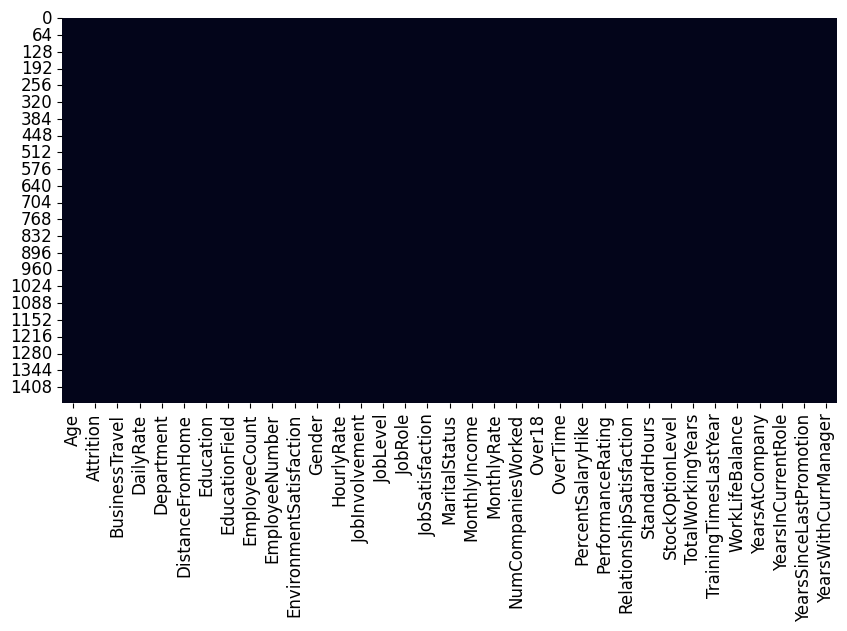

In [10]:
# Utilizando um heatmap para visualizar a presença de informações nulas no DataFrame
sns.heatmap(funcionarios.isnull(), cbar = False);

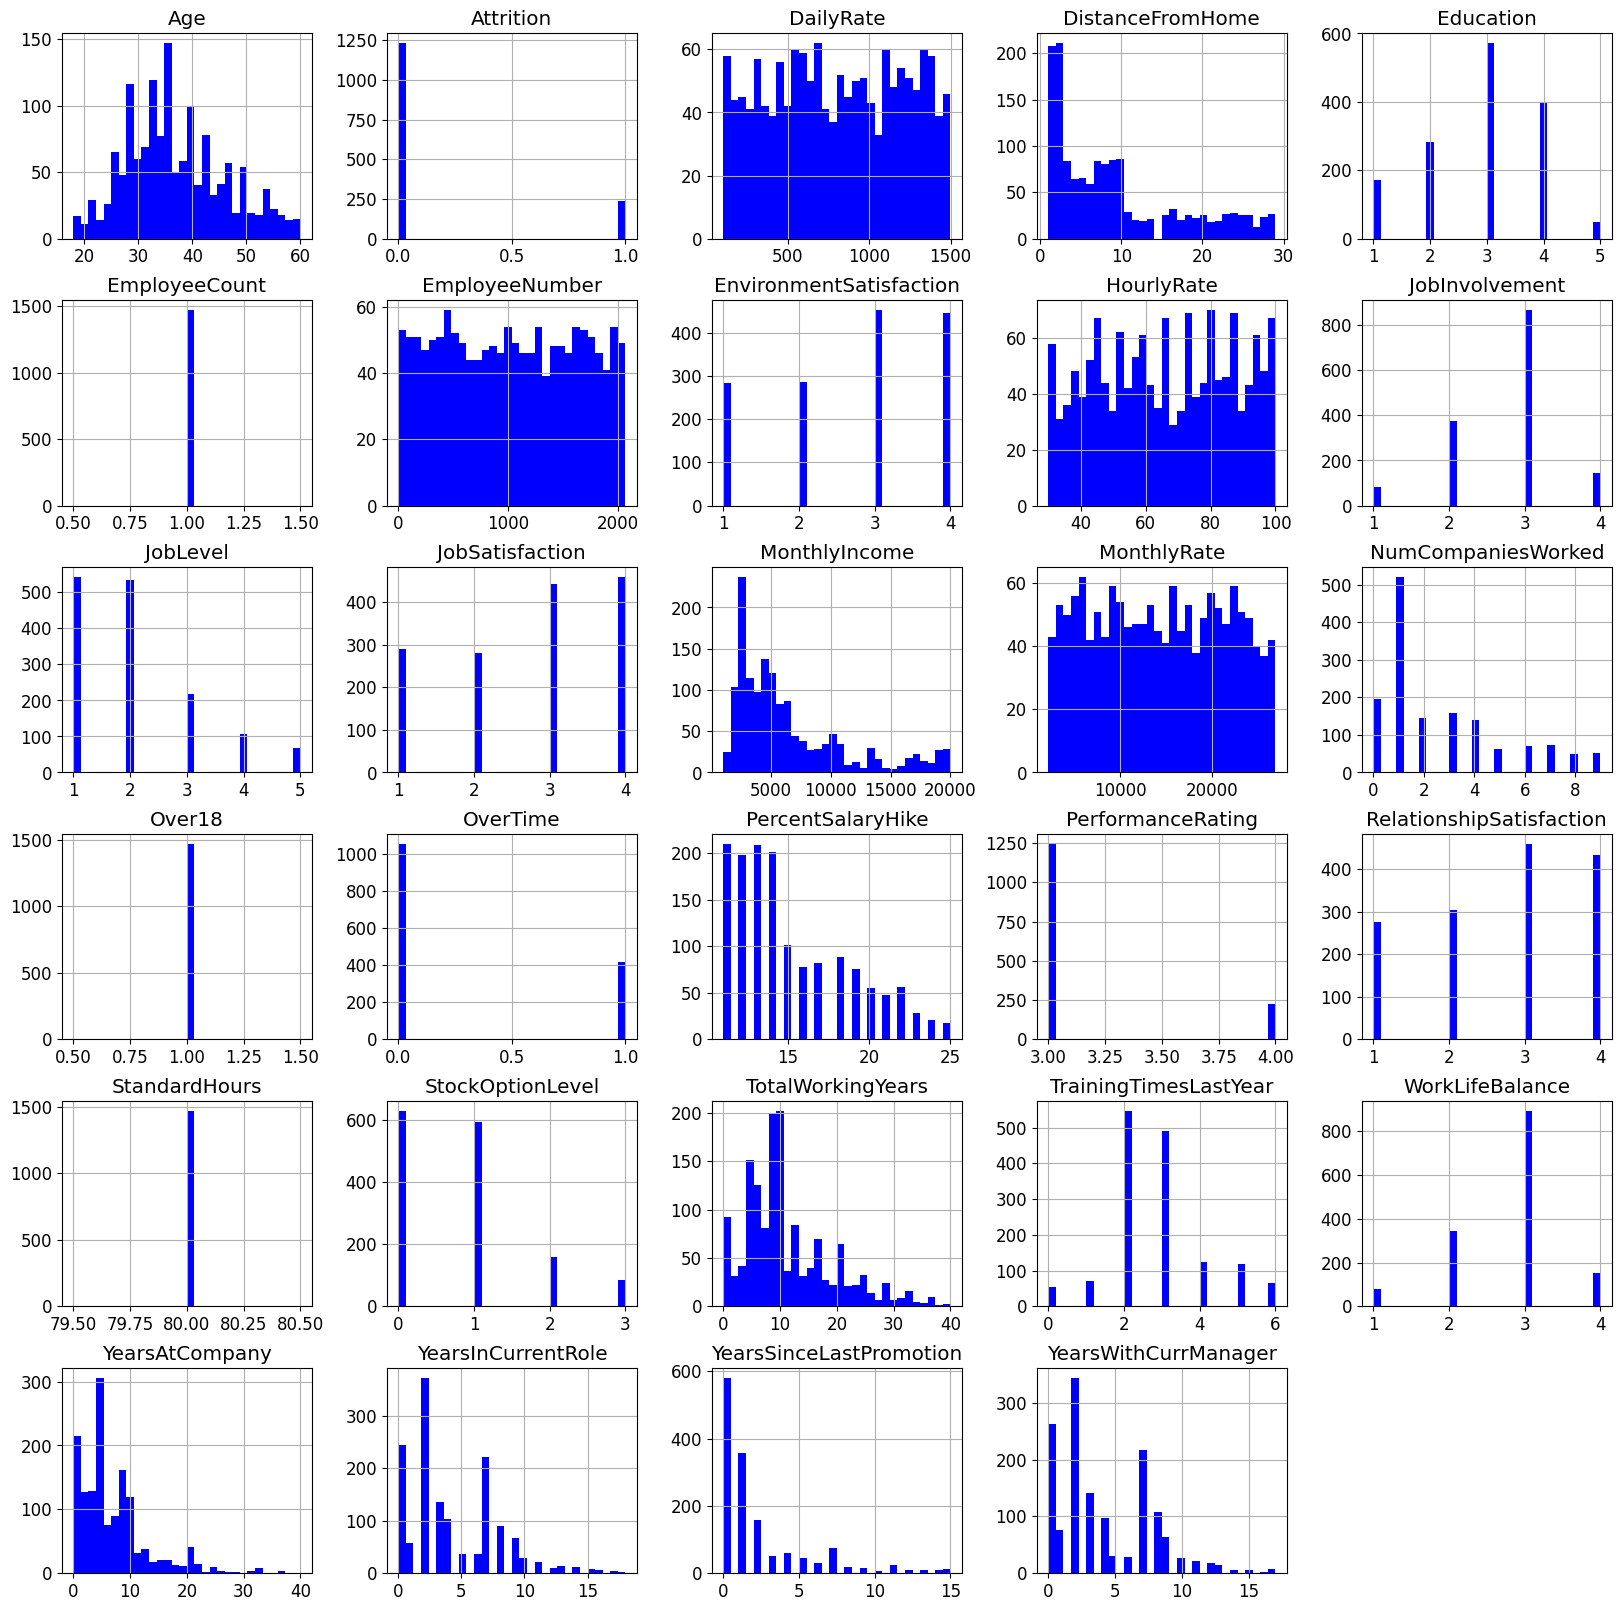

In [12]:
funcionarios.hist(bins = 30, figsize=(20,20), color = 'b');


Além dos atributos já comentados, temos o atributo `Over18`, onde todos os valores são iguais a 1, indicando que todos os funcionários têm **mais de 18 anos**. Isso significa que esta variável não adiciona *nenhuma informação relevante* ao conjunto de dados e pode ser descartada.

A coluna **`EmployeeNumber`** recebe um valor único para cada funcionário, o que significa que não há relação entre seu valor e a saída de funcionários da empresa. Portanto, esta coluna também pode ser descartada.

Após a exclusão destas variáveis, o conjunto de dados fica mais simples e fácil de analisar. Isso permite que os resultados da análise sejam mais precisos e confiáveis.

In [13]:
funcionarios.drop(
    ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

# A função `drop()` remove as colunas especificadas do DataFrame.
# O argumento `axis=1` especifica que as colunas serão removidas.
# O argumento `inplace=True` especifica que a função será executada no próprio DataFrame.

In [14]:
funcionarios.shape

(1470, 31)

Depois de remover 4 colunas do DataFrame, podemos ter certeza de que a função drop() funcionou.

Agora, podemos **criar** **dois** novos **DataFrames** para analisar os **fatores** que motivam a **saída de funcionários**.
* O primeiro **DataFrame** incluirá apenas os funcionários que já saíram da empresa
* Enquanto o segundo **DataFrame** incluirá apenas os funcionários que ainda estão na empresa.

Ao **comparar** os dois **DataFrames**, podemos identificar possíveis diferenças entre os funcionários que saíram e os funcionários que permaneceram na empresa. Essas diferenças podem nos fornecer **insights** sobre os fatores que motivam a saída de funcionários.

In [15]:
# Criando DataFrame
ex_funcionario = funcionarios[funcionarios['Attrition'] == 1]
em_atividade = funcionarios[funcionarios['Attrition'] == 0]

In [16]:
print('Total = ', len(funcionarios))
print('Número de funcionários que saíram da empresa = ', len(ex_funcionario))
print('Porcentagem de funcionários que saíram da empresa = ',
      (len(ex_funcionario) / len(funcionarios)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(em_atividade))
print('Porcentagem de funcionários que ficaram na empresa = ',
      (len(em_atividade) / len(funcionarios)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [17]:
ex_funcionario.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [18]:
em_atividade.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Fazendo uma **comparação direta entre os dois DataFrames**, é possível **identificar** os seguintes fatores como possíveis causas da saída de funcionários:

* **Idade**: a média de idade dos funcionários que saíram é **menor**, o que indica que funcionários **mais jovens** têm uma maior tendência a **sair da empresa**.

* **Salário**: a **média salarial** é **menor** entre os funcionários que não fazem mais parte da empresa.

* **Distância de casa para o trabalho**: a **distância** de casa para o trabalho **é maior** para os funcionários que **saíram** do que para os funcionários que ainda estão na empresa.

* **Nível de educação**: o **nível de educação** entre os dois grupos **tem uma diferença pequena**, o que pode indicar que os funcionários que saíram estão **buscando cargos maiores** em outras empresas.

* **Nível de satisfação**: o nível de **satisfação dos funcionários** que saíram é **menor** do que o dos funcionários que permanecem na empresa.

* **Nível de envolvimento**: entre os funcionários que permanecem na empresa há uma pequena tendência de se envolver mais com o trabalho.

* **Nível do cargo ocupado**: em acordo com a hipótese apresentada no nível de educação, temos uma diferença clara entre o nível do cargo ocupado entre os funcionários, sendo os funcionários que já saíram no geral apresentando cargos mais baixos e os funcionários que permanecem na empresa ocupando cargos mais altos.

* **Satisfação com as relações no ambiente de trabalho**: os funcionários que já deixaram a empresa têm no geral uma satisfação menor com as relações no ambiente de trabalho, o que pode indicar discordâncias com a cultura geral da empresa.

* **Tempo de empresa**: funcionários **mais antigos** tendem a permanecer na empresa.

* **Tempo gasto em treinamento**: o tempo gasto em treinamento é semelhante para ambos, o que representa um **custo maior** para a empresa quando ela perde um funcionário.

Esses fatores podem ser usados para identificar as áreas onde a empresa pode melhorar para reduzir a rotatividade de funcionários. Por exemplo, a empresa pode oferecer salários mais altos, benefícios melhores, oportunidades de crescimento profissional e um ambiente de trabalho mais agradável.

<ipython-input-19-abbf2edc35fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = funcionarios.corr() # função que exibe a correlação das variáveis


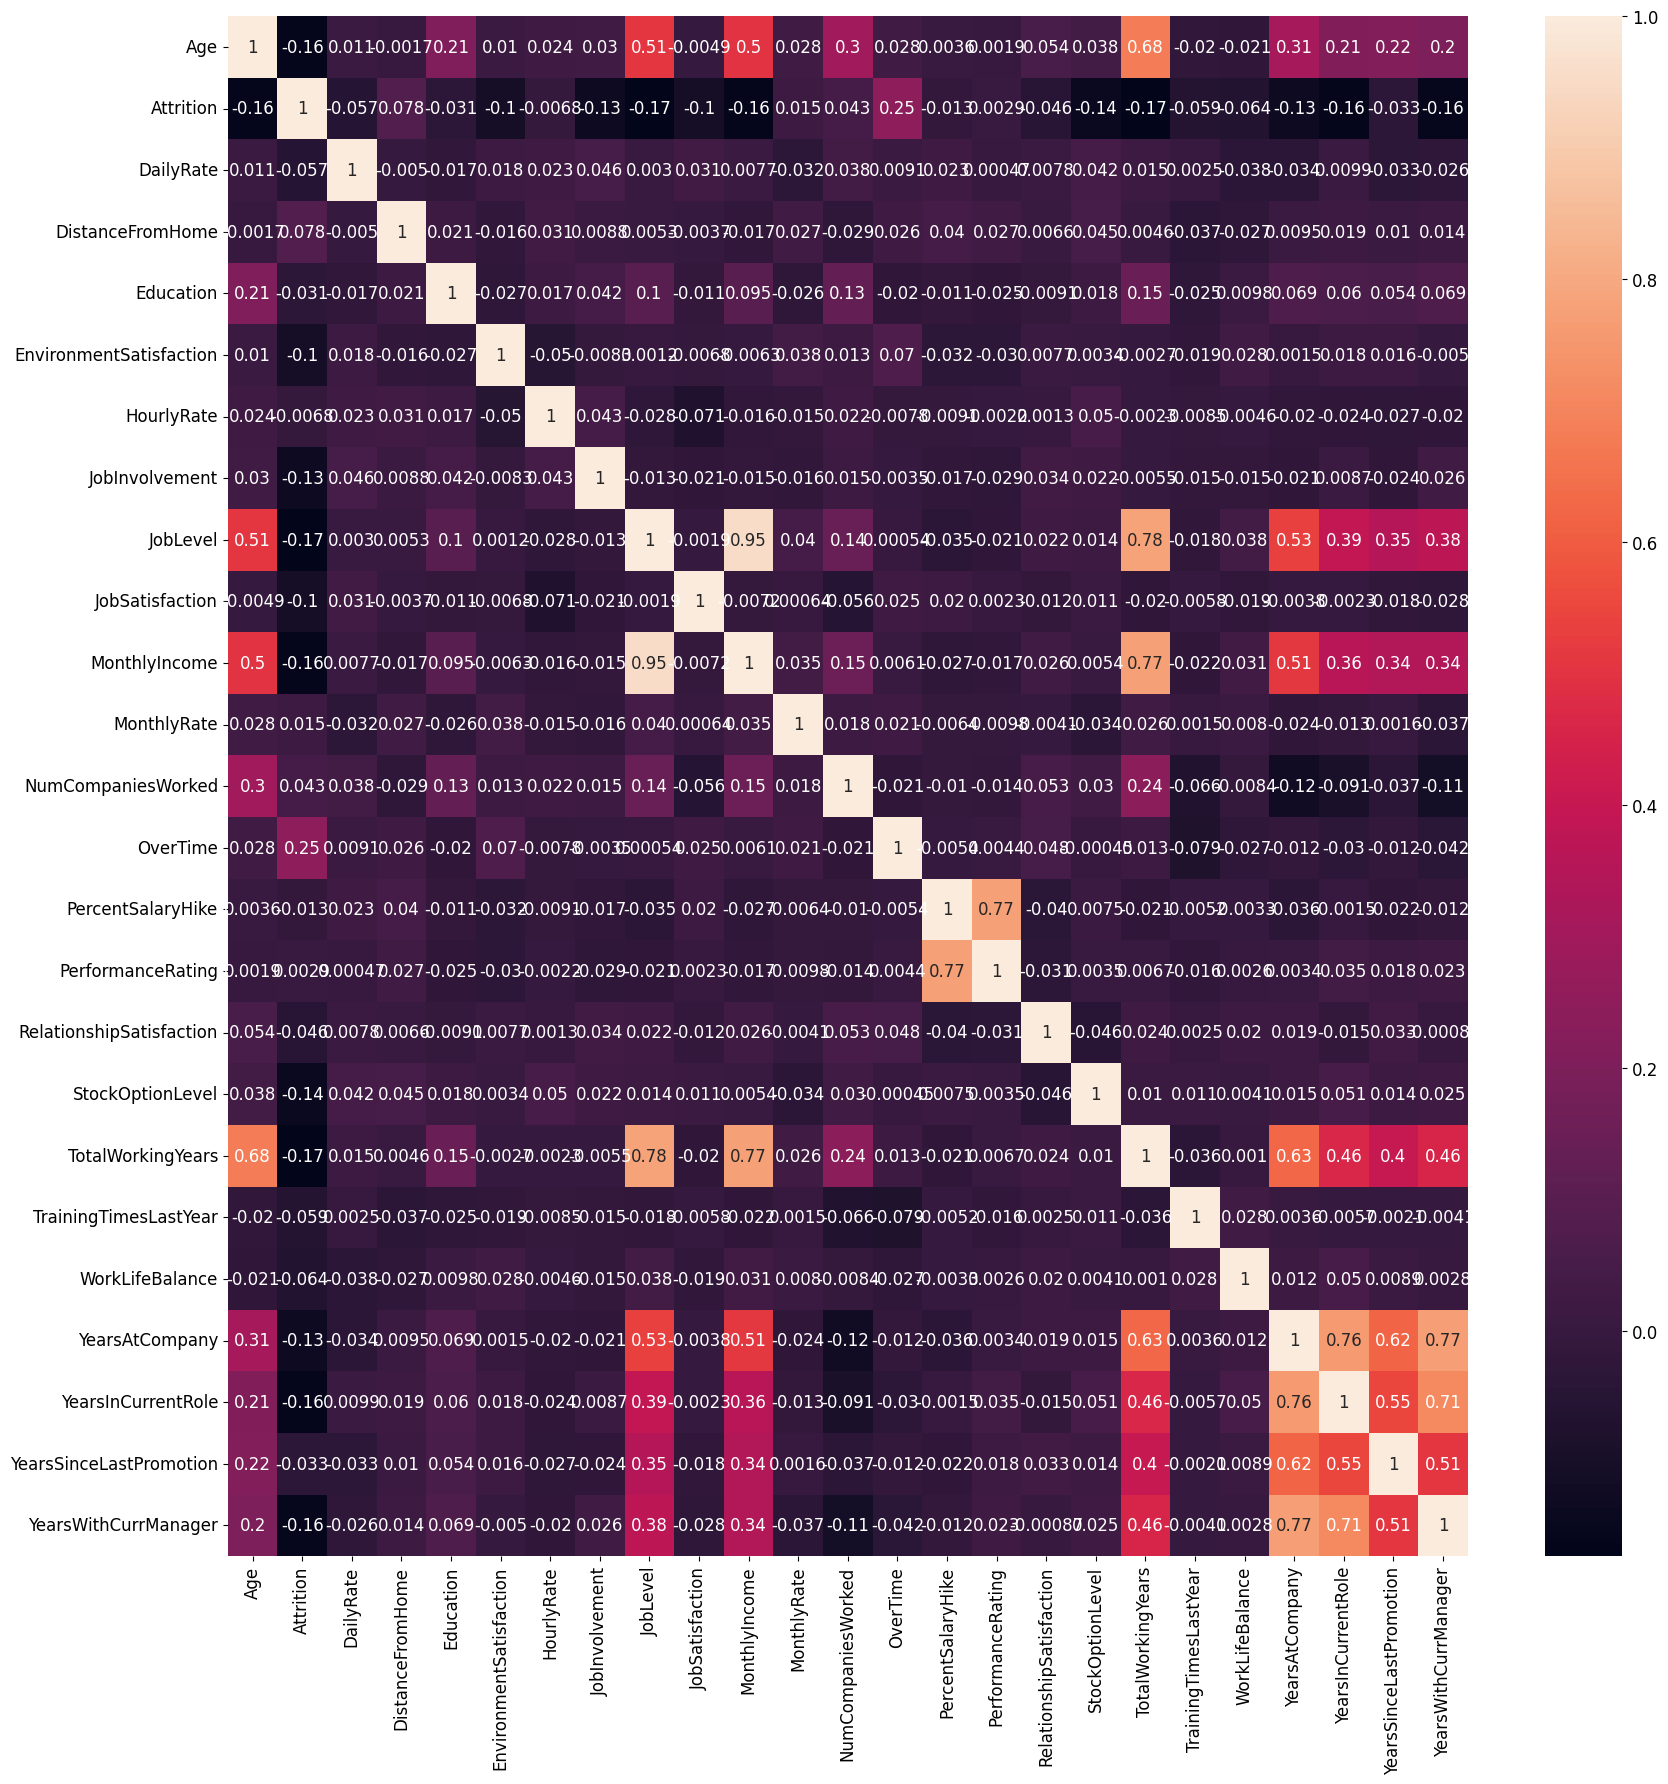

In [19]:
correlacao = funcionarios.corr() # função que exibe a correlação das variáveis
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacao, annot=True);

Ao **analisarmos a comparação entre os dois DataFrames** por meio da função '`describe'`, notamos as principais correlações **negativas** com fatores como **idade**, **cargo** e **tempo de serviço na empresa**, especialmente quando esses fatores estão **associados** ao **mesmo gerente**.

Quanto às relações **positivas**, destacam-se as **horas extras** como o fator de maior **influência**, ligando-se ao desligamento de funcionários. Em sequência, vêm a **distância entre casa e o trabalho**, juntamente com o número de empresas nas quais o funcionário já trabalhou. Esse último fator pode estar relacionado a funcionários com um alto nível de assertividade na tomada de decisões, que por vezes não se identificam plenamente com a cultura da companhia. Como resultado, essa falta de alinhamento pode contribuir para uma taxa mais elevada de **rotatividade**.

In [20]:
ex_funcionario['OverTime'].mean()

0.5358649789029536

In [21]:
em_atividade['OverTime'].mean()

0.23438767234387672

Como pode ser notado acima, a **média de horas extras** entre **ex-funcionários** é **mais que o dobro** da média das horas extras entre os **funcionários** que permanecem na empresa."

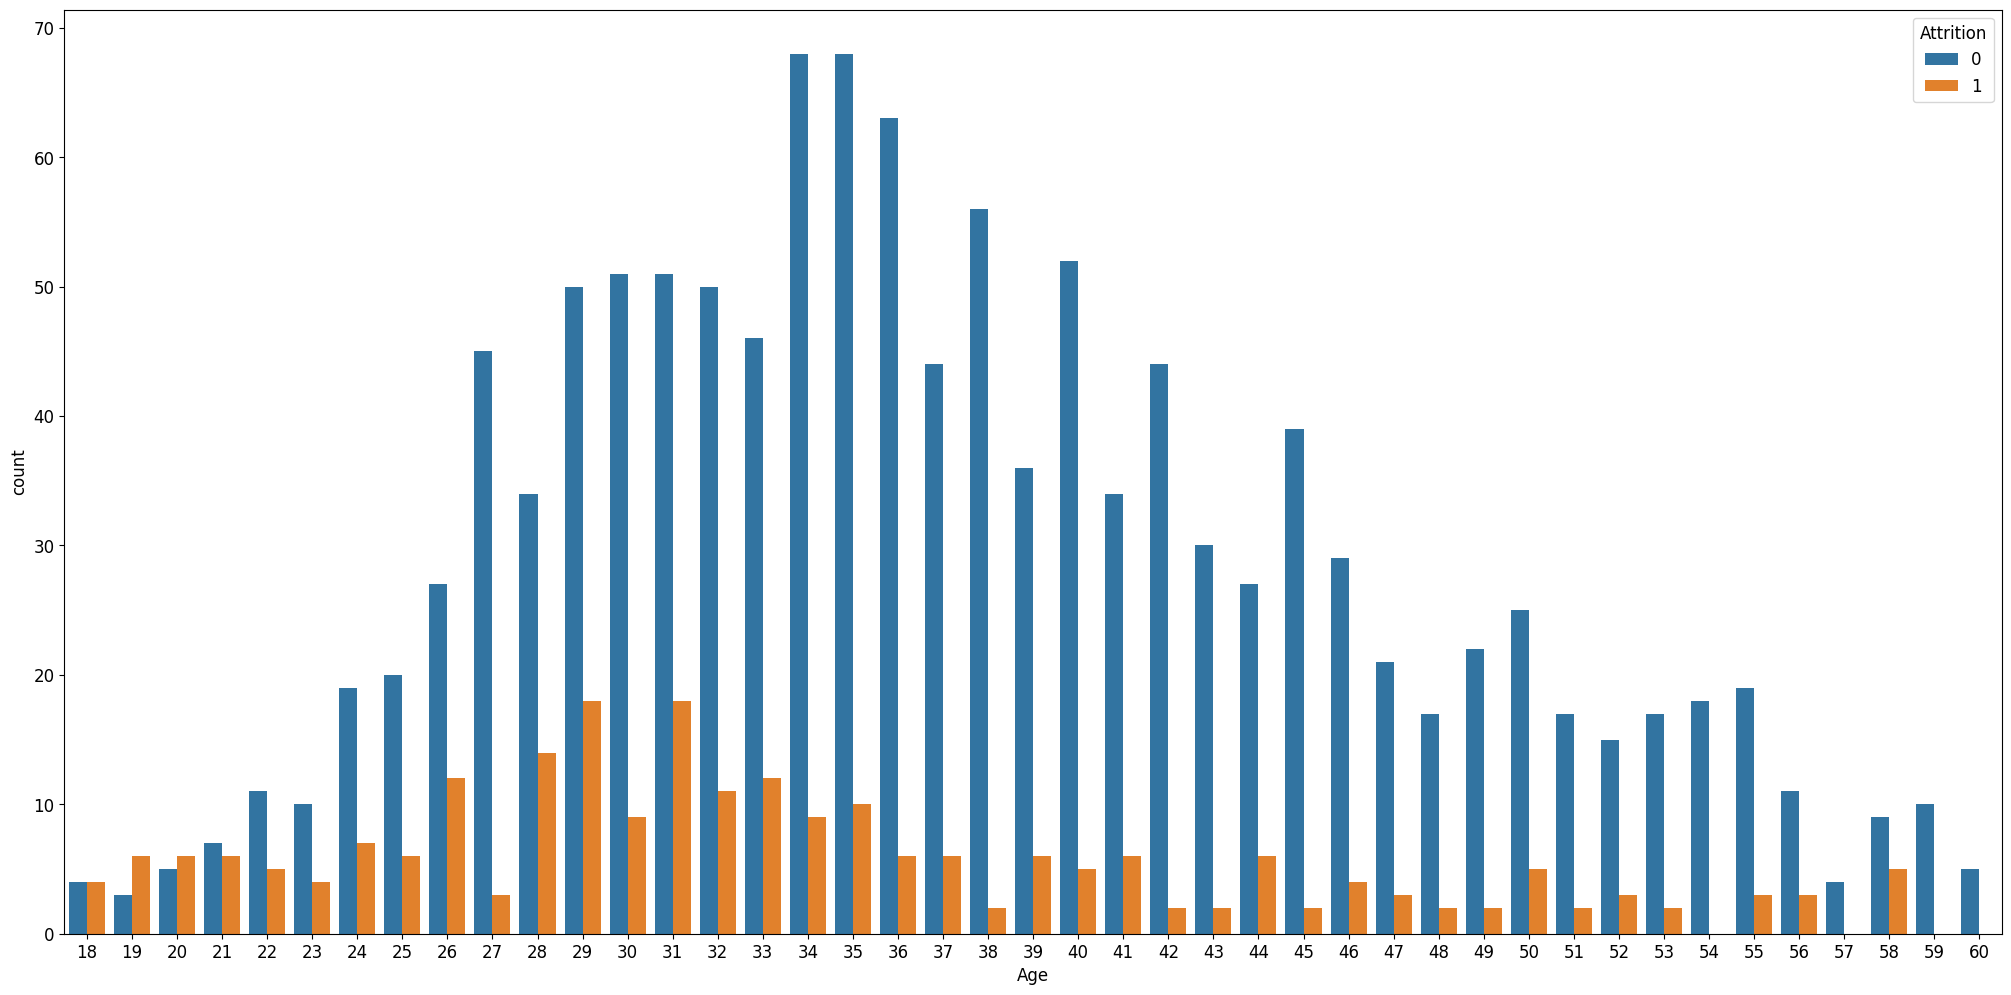

In [22]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = funcionarios);


Revisitando os dados fornecidos pela função '`describe`', notamos que **metade** das pessoas que deixaram a empresa tinham até **32 anos**. Além disso, chamamos a atenção para um **padrão específico**: os funcionários com idades de **19 e 20 anos** apresentam uma taxa de desligamento **superior** à taxa de **contratação**.

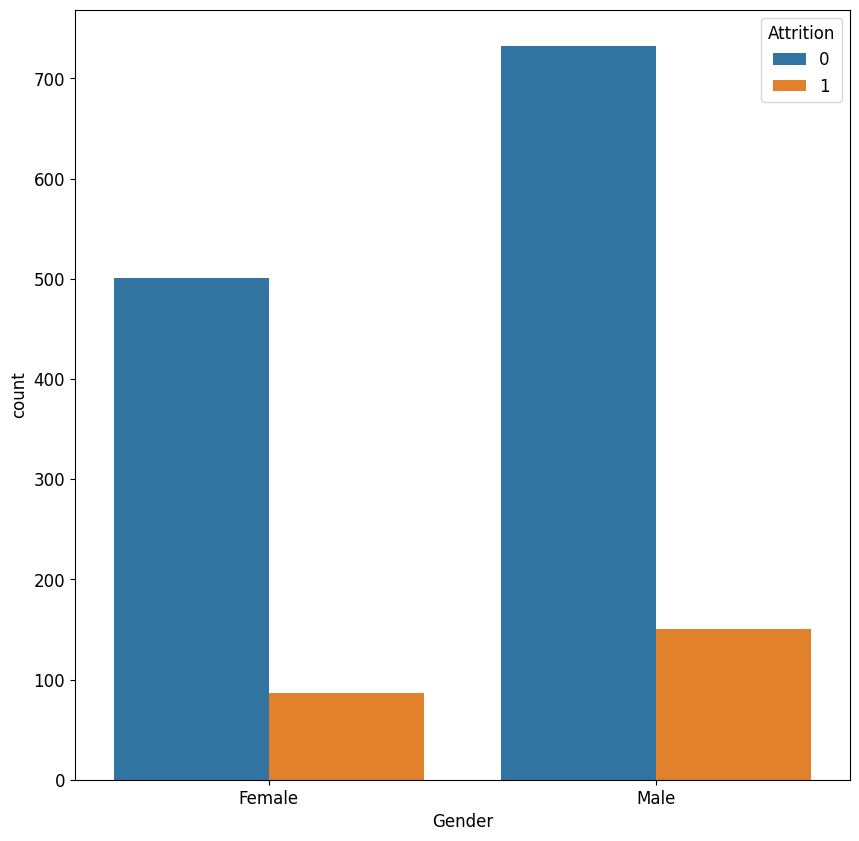

In [23]:
plt.figure(figsize=[10,10])
sns.countplot(x = 'Gender', hue = 'Attrition', data = funcionarios);

Através deste gráfico, é evidente que a empresa conta com um maior contingente de funcionários do **sexo masculino**, o que também corresponde ao gênero que apresenta a maior taxa de **desligamento**.

<Axes: xlabel='JobLevel', ylabel='count'>

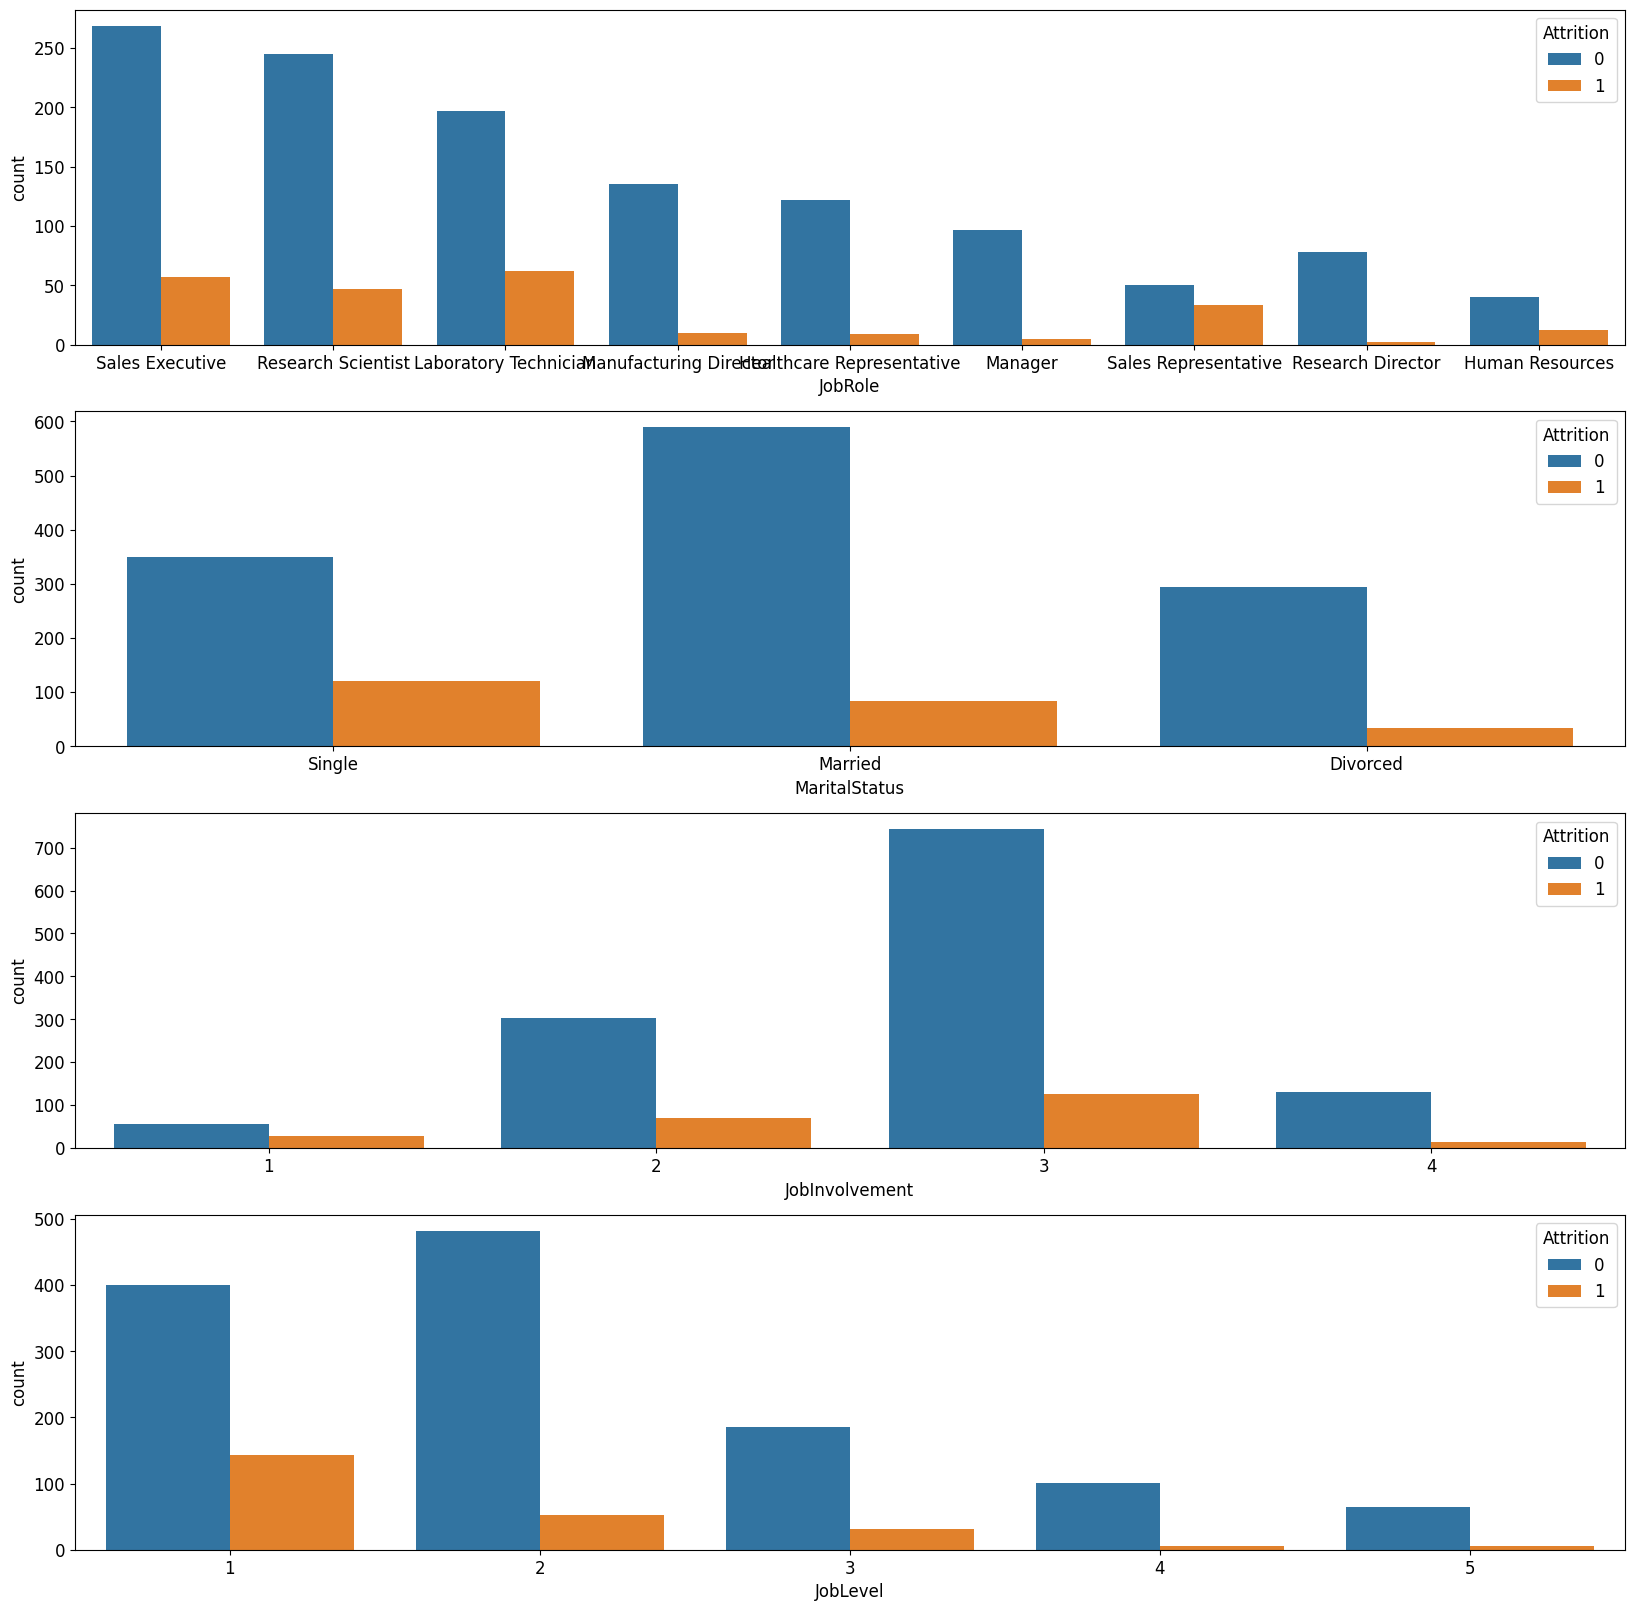

In [24]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = funcionarios)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = funcionarios)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = funcionarios)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = funcionarios)

* No primeiro gráfico, podemos notar que os cargos mais suscetíveis a saídas da empresa são os de '**Representante de Vendas**', seguidos pelos '**Técnicos de Laboratório**'.

* No segundo gráfico, destaca-se que os indivíduos com estado civil '**Solteiro(a)**' apresentam uma taxa de **desligamento** **mais alta**, possivelmente devido à **ausência de dependentes** que poderiam influenciar em suas decisões de permanência ou saída da empresa.

* No terceiro gráfico, conforme esperado, observamos que os níveis mais elevados de **insatisfação** se correlacionam com índices mais altos de desligamento.

* Finalmente, o quarto gráfico revela uma conexão direta com o primeiro gráfico, onde os funcionários de **menor hierarquia** apresentam a maior proporção de **desligamentos**.

<ipython-input-31-c0a2b73ebe9d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ex_funcionario['DistanceFromHome'], label='Funcionários que saíram', shade=True, color='r')
<ipython-input-31-c0a2b73ebe9d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(em_atividade['DistanceFromHome'], label='Funcionários que ficaram', shade=True, color='g')


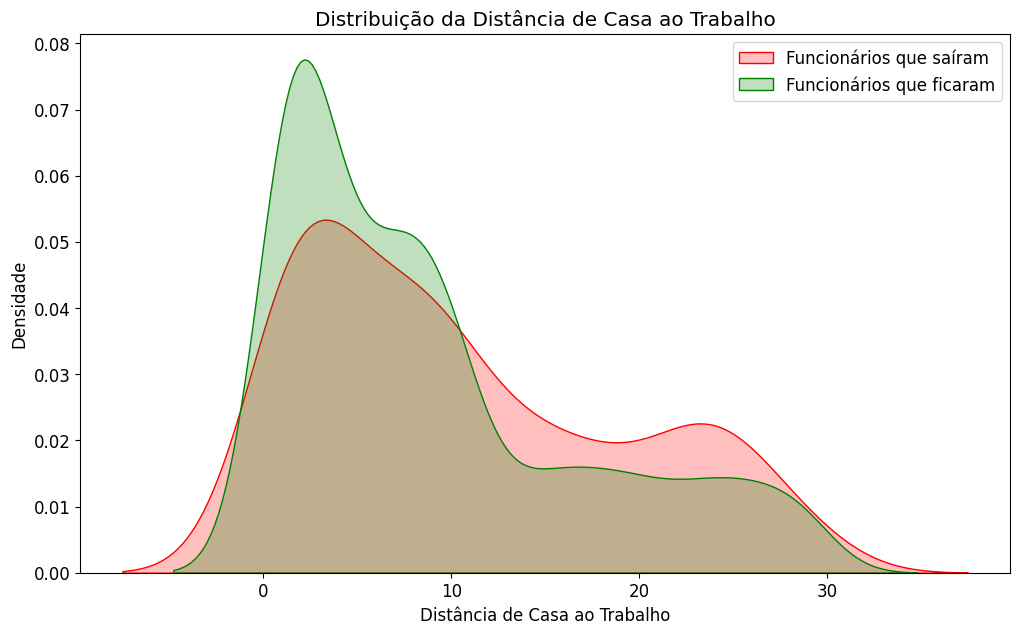

In [31]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(ex_funcionario['DistanceFromHome'], label='Funcionários que saíram', shade=True, color='r')
sns.kdeplot(em_atividade['DistanceFromHome'], label='Funcionários que ficaram', shade=True, color='g')
plt.xlabel('Distância de Casa ao Trabalho')
plt.ylabel('Densidade')
plt.title('Distribuição da Distância de Casa ao Trabalho')
plt.legend()
plt.show()


Neste gráfico, é evidente que a proporção de indivíduos que moram a uma distância superior a **10 km** e saíram da empresa é **maior** do que aquela dos que **permaneceram na empresa**.

<ipython-input-32-a53bb6c484bd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ex_funcionario['TotalWorkingYears'], label='Funcionários que saíram', shade=True, color='r')
<ipython-input-32-a53bb6c484bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(em_atividade['TotalWorkingYears'], label='Funcionários que ficaram', shade=True, color='b')


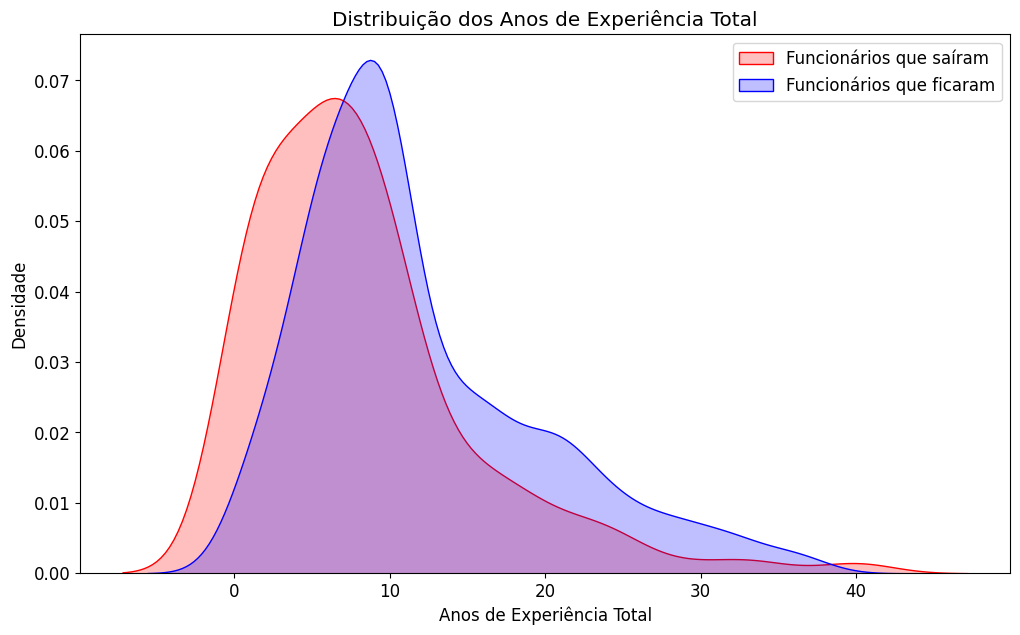

In [32]:
plt.figure(figsize=(12, 7))

sns.kdeplot(ex_funcionario['TotalWorkingYears'], label='Funcionários que saíram', shade=True, color='r')
sns.kdeplot(em_atividade['TotalWorkingYears'], label='Funcionários que ficaram', shade=True, color='b')

plt.xlabel('Anos de Experiência Total')
plt.ylabel('Densidade')
plt.title('Distribuição dos Anos de Experiência Total')
plt.legend()

plt.show()


Neste gráfico, fica evidente a tendência de pessoas com um **menor período de trabalho** na empresa acabarem por se **desligar**.

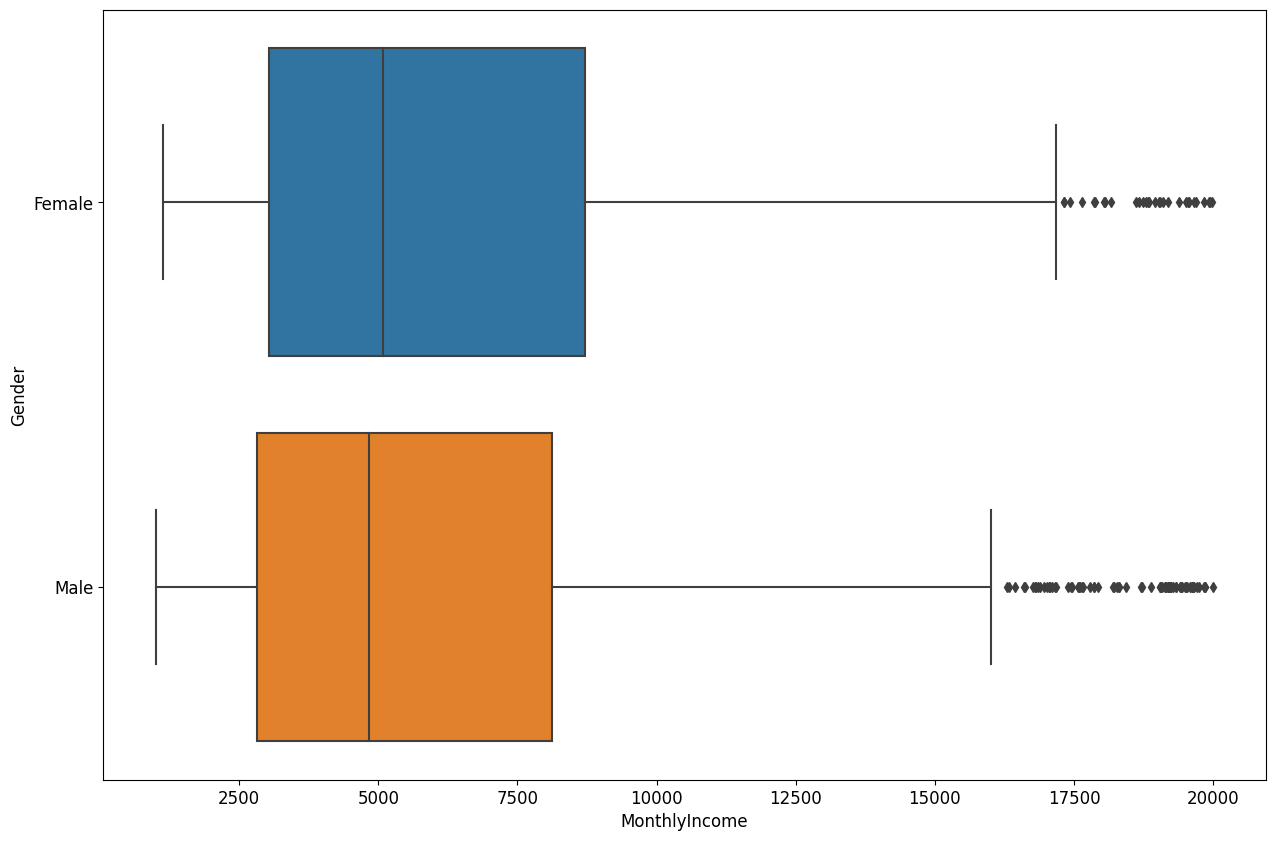

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=funcionarios);

Refletindo sobre o **histograma de gênero**, no qual notamos que o **gênero masculino** registra a maior quantidade de **desligamentos**, é interessante observar que, nesta análise, as mulheres apresentam, em geral, **salários mais elevados do que os homens**. Esse é um fato relevante a ser considerado no contexto em questão.

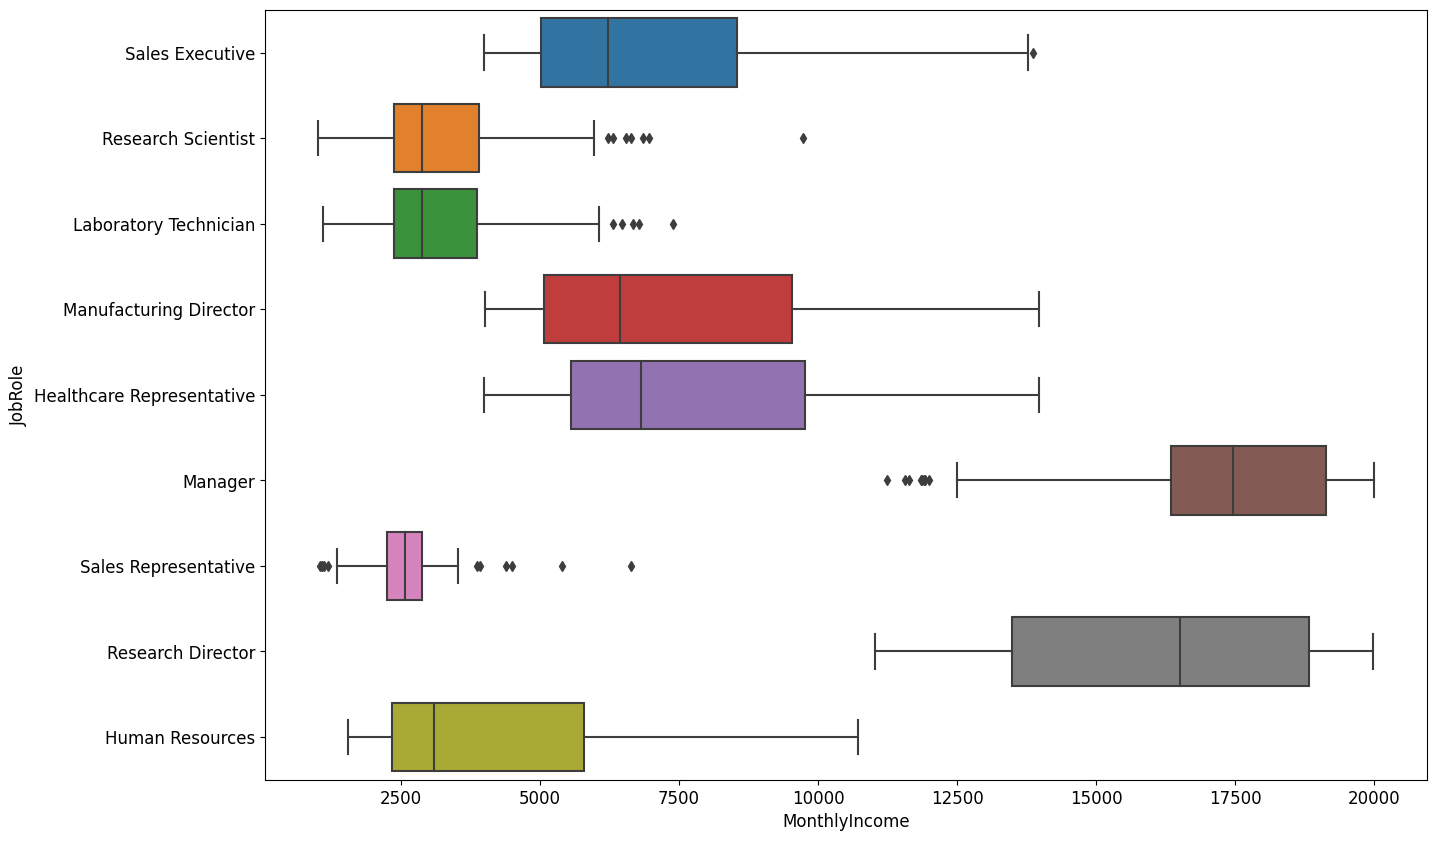

In [34]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=funcionarios);

Da mesma forma que observamos no **gráfico anterior**, aqui também encontramos a associação entre os **desligamentos** e os **cargos** que geralmente **possuem** **salários mais baixos**.

# 5. Pré-processamento e Divisão em Conjuntos de Treinamento/Teste


In [35]:
funcionarios.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## **Processo para transformar as variáveis categóricas em variáveis numéricas**



In [36]:
# criando um DataFrame que contenha somente variáveis catergóricas
X_categorico = funcionarios[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_categorico.head()


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [37]:
# criando variáveis dummy
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categorico = onehotencoder.fit_transform(X_categorico).toarray()

In [38]:
X_categorico.shape


(1470, 26)

In [39]:
type(X_categorico)


numpy.ndarray

In [40]:
X_categorico = pd.DataFrame(X_categorico)
type(X_categorico)


pandas.core.frame.DataFrame

Variáveis `dummies` são empregadas para representar variáveis **categóricas** em formato **numérico**.



In [41]:
# DataFrame com as variáveis numéricas
X_numerico = funcionarios[['Age', 'DailyRate', 'DistanceFromHome',	'Education',
                            'EnvironmentSatisfaction', 'HourlyRate',
                            'JobInvolvement',	'JobLevel',	'JobSatisfaction',
                            'MonthlyIncome',	'MonthlyRate',
                            'NumCompaniesWorked',	'OverTime',
                            'PercentSalaryHike', 'PerformanceRating',
                            'RelationshipSatisfaction',	'StockOptionLevel',
                            'TotalWorkingYears'	, 'TrainingTimesLastYear',
                            'WorkLifeBalance',	'YearsAtCompany',
                            'YearsInCurrentRole', 'YearsSinceLastPromotion',
                            'YearsWithCurrManager']]
X_numerico.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [42]:
# União dos dois DataFrames
X_all = pd.concat([X_categorico, X_numerico], axis = 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [49]:
# Normatização dos dados com objetivo de evitar viés
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)  # Convertendo nomes das colunas para string
X = scaler.fit_transform(X_all)


In [50]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [51]:
y = funcionarios['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [52]:
# Dividindo a base de dados em base de treino e base de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [53]:
X_train.shape, y_train

((1102, 50),
 1240    0
 1138    0
 520     0
 1115    0
 1179    0
        ..
 354     0
 605     0
 689     1
 422     1
 627     0
 Name: Attrition, Length: 1102, dtype: int64)

In [54]:
X_test.shape, y_test


((368, 50),
 182     1
 598     1
 1085    1
 997     1
 728     0
        ..
 459     0
 618     0
 1371    0
 100     1
 1063    0
 Name: Attrition, Length: 368, dtype: int64)

# 6. Aplicação de Modelos de Aprendizado de Máquina


## ***Regressão logística***

In [55]:
from sklearn.linear_model import LogisticRegression


In [56]:
regressao = LogisticRegression()
regressao.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = regressao.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
y_test

182     1
598     1
1085    1
997     1
728     0
       ..
459     0
618     0
1371    0
100     1
1063    0
Name: Attrition, Length: 368, dtype: int64

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [62]:
accuracy_score(y_test, y_pred)


0.8695652173913043

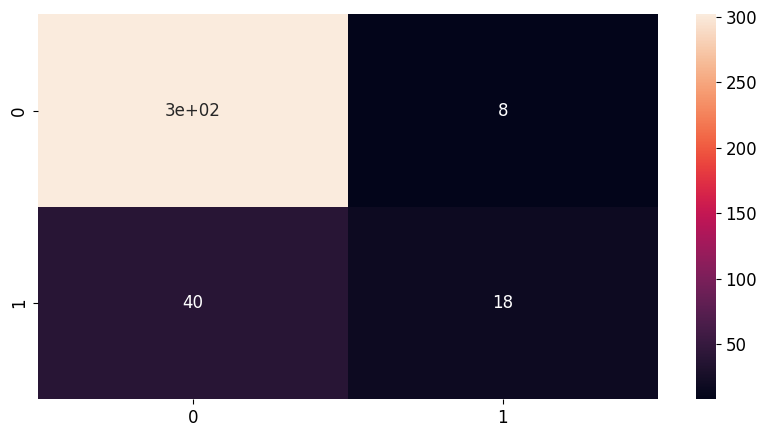

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [64]:
cm

array([[302,   8],
       [ 40,  18]])

O algoritmo classificou com precisão 302 funcionários que permanecerão na empresa e também identificou corretamente 18 funcionários que saíram. No entanto, houve uma classificação incorreta de 8 funcionários que deixaram a empresa como se fossem permanecer e 40 funcionários foram classificados erroneamente como se fossem ficar na empresa, mas na verdade saíram ou têm intenção de sair.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       310
           1       0.69      0.31      0.43        58

    accuracy                           0.87       368
   macro avg       0.79      0.64      0.68       368
weighted avg       0.85      0.87      0.85       368



Usando a métrica de precisão, podemos afirmar que, ao prever que um funcionário permanecerá na empresa, o modelo está correto em 88% das vezes. Ao prever que um funcionário sairá, o modelo acerta em 69% dos casos. Por outro lado, a métrica de abrangência (recall) nos permite concluir que o modelo classificará corretamente 97% dos casos ao identificar pessoas que permanecerão na empresa, e acertará 31% dos casos ao identificar pessoas que sairão da empresa.

## **Random forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier


In [68]:
floresta = RandomForestClassifier()
floresta.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = floresta.predict(X_test)


In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
accuracy_score(y_test, y_pred)


0.845108695652174

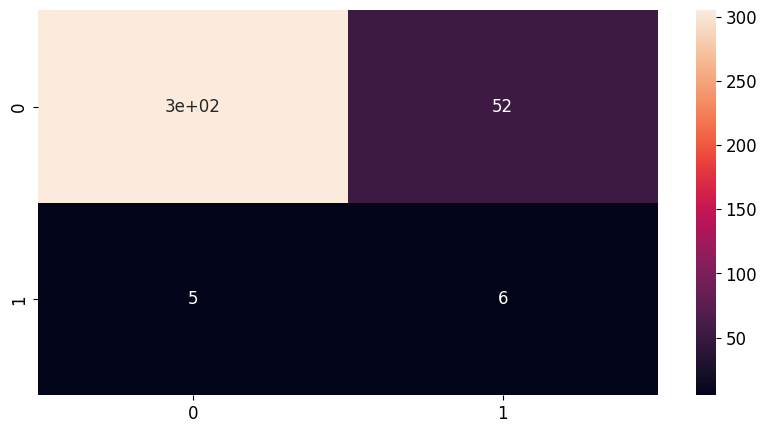

In [72]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [73]:
cm

array([[305,  52],
       [  5,   6]])

O algoritmo acertou na classificação de 305 funcionários que permanecerão na empresa e, infelizmente, equivocadamente classificou 52 funcionários que saíram da empresa como se fossem permanecer. Além disso, o algoritmo acertou na previsão de 6 pessoas que saíram da empresa, mas erroneamente classificou 5 funcionários como se fossem permanecer na empresa, quando na realidade saíram ou têm a intenção de sair.

In [74]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       310
           1       0.55      0.10      0.17        58

    accuracy                           0.85       368
   macro avg       0.70      0.54      0.54       368
weighted avg       0.81      0.85      0.80       368



Utilizando a **métrica** de **precisão**, podemos concluir que, ao prever que um funcionário permanecerá na empresa, o modelo acerta em 85% das vezes. Em relação à previsão de saída de funcionários, o modelo tem uma taxa de acerto de 55%. No entanto, considerando a métrica de abrangência (recall), fica evidente que o modelo tem uma precisão de 98% ao classificar funcionários que permanecerão na empresa, mas apenas 10% de precisão ao classificar funcionários que sairão da empresa.

## **SVM**

In [75]:
from sklearn.svm import SVC


In [76]:
vizinho = SVC(kernel='linear', random_state=1, C=2.0)
vizinho.fit(X_train, y_train)

SVC(C=2.0, kernel='linear', random_state=1)

In [78]:
y_pred = vizinho.predict(X_test)

In [79]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [80]:
accuracy_score(y_test, y_pred)

0.8695652173913043

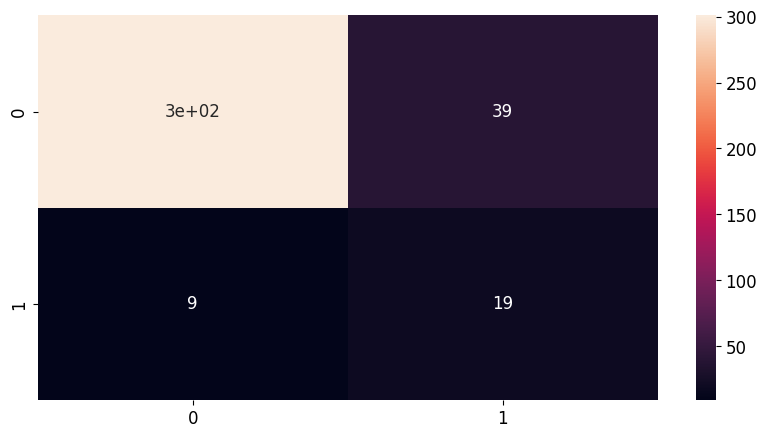

In [81]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [82]:
cm

array([[301,  39],
       [  9,  19]])

O algoritmo acertou a classificação de 301 funcionários que permanecerão na empresa e, lamentavelmente, equivocadamente classificou 39 funcionários que saíram da empresa como se fossem permanecer. Além disso, o algoritmo acertou na previsão de 19 pessoas que saíram da empresa, mas incorretamente classificou 09 funcionários como se fossem permanecer na empresa, quando na verdade saíram ou têm intenção de sair.

In [83]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       310
           1       0.68      0.33      0.44        58

    accuracy                           0.87       368
   macro avg       0.78      0.65      0.68       368
weighted avg       0.85      0.87      0.85       368



Com a métrica de precisão, podemos afirmar que ao prever que um funcionário permanecerá na empresa, o modelo estará correto em 89% das vezes. Ao prever que um funcionário sairá, o modelo acerta em 68% dos casos. Em relação à métrica de abrangência (recall), é possível concluir que o modelo classificará corretamente 97% dos casos ao identificar pessoas que permanecerão na empresa e 33% dos casos ao identificar pessoas que sairão da empresa.

## Redes Neurais Artificiais

In [84]:
import tensorflow as tf


In [85]:
X_train.shape


(1102, 50)

In [86]:
# definindo a quantidade de neurônios por camada
# (numero de entradas + numero de saídas)/2
(50 + 1) / 2

25.5

In [87]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [88]:
rede_neural.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [90]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [91]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 2ms/step - loss: 0.6363 - accuracy: 0.6343
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8376
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8376
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8403
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8466
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8548
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8693
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8748
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8802
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8829
Epoch 11/

In [92]:
y_pred = rede_neural.predict(X_test)
y_pred

12/12 [==============================] - 0s 3ms/step


array([[9.99973357e-01],
       [2.54773369e-10],
       [1.76747044e-08],
       [9.69481578e-11],
       [9.33260651e-08],
       [7.79492492e-18],
       [6.03027559e-07],
       [9.83471990e-01],
       [3.95803001e-10],
       [1.77159416e-16],
       [1.13724448e-01],
       [2.76106922e-03],
       [4.54511195e-01],
       [1.76047523e-12],
       [9.27419662e-01],
       [2.13827416e-02],
       [6.85985606e-06],
       [4.37328184e-04],
       [9.67916965e-01],
       [1.03358377e-06],
       [7.50259144e-09],
       [8.16524803e-09],
       [2.92318873e-04],
       [9.14032459e-01],
       [4.33504318e-12],
       [1.00000000e+00],
       [9.03901845e-13],
       [4.55569915e-10],
       [2.58501932e-05],
       [4.51588720e-01],
       [1.88233054e-04],
       [1.00000000e+00],
       [5.36339679e-12],
       [3.70030170e-06],
       [2.14978339e-12],
       [4.51202400e-12],
       [5.64866209e-11],
       [3.18384195e-07],
       [1.05175772e-03],
       [3.52476945e-08],


In [93]:
y_pred = (y_pred >= 0.5)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

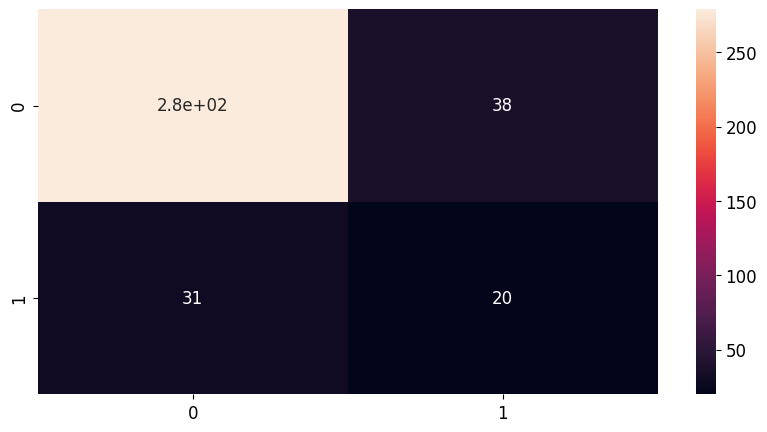

In [94]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [96]:
cm

array([[279,  38],
       [ 31,  20]])

O algoritmo teve um desempenho geral positivo, classificando corretamente 279 funcionários que não vão sair da empresa e 20 que saíram da empresa. No entanto, também classificou 38 funcionários que saíram da empresa como funcionários que iriam permanecer na empresa e 31 funcionários como se fossem ficar empresa e que na realidade saíram ou pretendem sair.

In [95]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       310
           1       0.39      0.34      0.37        58

    accuracy                           0.81       368
   macro avg       0.64      0.62      0.63       368
weighted avg       0.80      0.81      0.81       368



A precisão do modelo é de 88%, o que significa que, ao prever que um funcionário vai ficar na empresa, o modelo estará correto em 88% das vezes. No entanto, a precisão do modelo para prever que um funcionário vai sair é de apenas 39%. O recall do modelo é de 90%, o que significa que, ao classificar pessoas que vão ficar na empresa, o modelo irá classificar corretamente 90% dos casos. No entanto, o recall do modelo para classificar pessoas que vão sair é de apenas 34%.

Em geral, o modelo é melhor em prever que os funcionários vão ficar na empresa do que em prever que os funcionários vão sair. Isso pode ser devido ao fato de que existem mais funcionários que vão ficar na empresa do que funcionários que vão sair.

# 7. Considerações Finais

Conclusão

A partir dos métodos de avaliação utilizados foi possível identificar fatores significativos e grupos de funcionários que possuem uma maior propensão a sair da empresa.

**Os principais fatores que foram identificados foram:**

* Idade
* Cargo
* Anos de trabalho na empresa
* Mesmo gerente
* Hora extra
* Distância de casa ao trabalho
* Número de empresas que o funcionário já trabalhou

**Os grupos de funcionários que possuem uma maior propensão a sair da empresa são:**

* Funcionários mais jovens
* Funcionários que ocupam cargos mais baixos
* Funcionários que trabalham na empresa há menos tempo
* Funcionários que trabalham com o mesmo gerente há mais tempo
* Funcionários que trabalham mais horas extras
* Funcionários que moram longe do trabalho
* Funcionários que já trabalharam em várias empresas

Com base nos métodos de avaliação utilizados, os modelos com melhor resultado foram a regressão logística e o SVM. No entanto, o SVM foi ligeiramente superior tanto para classificar quem vai ficar na empresa como quem pretende sair da empresa.

Os resultados deste estudo podem ser usados para ajudar as empresas a identificar os funcionários que estão em maior risco de sair da empresa. As empresas podem então tomar medidas para reduzir esse risco, como oferecendo salários mais altos, benefícios melhores, oportunidades de crescimento profissional e um ambiente de trabalho mais agradável.

Este projeto representa um passo em direção ao entendimento e solução dos desafios propostos, evidenciando o potencial da análise de dados e da aprendizagem ao longo deste processo.


---


🔗Links

* [LinkedIn](https://www.linkedin.com/in/sarahfrezende/).
* [GitHub](https://github.com/SarahFeanor)